In [1]:
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D,Conv2DTranspose,Flatten,MaxPool2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.
/anaconda3/envs/keras/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
def seed_everything(SEED):
    np.random.seed(SEED)
    tf.set_random_seed(SEED)
    random.seed(SEED)

seed_everything(224)

In [3]:
x_train = np.load('/Users/marcowang/CS_6000_Deep_Learning/HW1__NN/mnist.train.npy')
y_train = np.load('/Users/marcowang/CS_6000_Deep_Learning/HW1__NN/mnist.trainlabel.npy')
x_test = np.load('/Users/marcowang/CS_6000_Deep_Learning/HW1__NN/mnist.test.npy')

In [4]:
x_train.shape

(56000, 28, 28)

In [5]:
ae = Sequential()
ae.add(Conv2D(input_shape = np.expand_dims(x_train,1).shape[1:],
              filters = 16,
              data_format = "channels_first",
              kernel_size=(3,3),strides = 1,
             padding = "same",activation="relu"))
ae.add(MaxPool2D(pool_size=(2, 2),data_format = "channels_first"))
ae.add(Conv2D(
              filters = 4,
              data_format = "channels_first",
              kernel_size=(3,3),strides = 1,
             padding = "same",activation="relu"))
ae.add(MaxPool2D(pool_size=(2, 2),data_format = "channels_first"))

ae.add(Conv2DTranspose(
              filters = 16,
              data_format = "channels_first",
              kernel_size=(2,2),strides = 2,activation="relu"))
ae.add(Conv2DTranspose(
              filters = 1,
              data_format = "channels_first",
              kernel_size=(2,2),strides = 2,activation="sigmoid"))
ae.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
ae.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 28, 28)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 14, 14)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 14, 14)         580       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 7, 7)           0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 16, 14, 14)        272       
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 1, 28, 28)         65        
Total params: 1,077
Trainable params: 1,077
Non-trainable params: 0
_________________________________________________________________


In [10]:
x_train = x_train.reshape(-1,1,28,28)

In [11]:
ae.fit(x_train,x_train,epochs=20)

Epoch 1/20
56000/56000 [==============================] - 173s - loss: 0.0404 - acc: 0.1897   
Epoch 2/20
56000/56000 [==============================] - 171s - loss: 0.0159 - acc: 0.2243   
Epoch 3/20
56000/56000 [==============================] - 175s - loss: 0.0143 - acc: 0.2335   
Epoch 4/20
56000/56000 [==============================] - 183s - loss: 0.0134 - acc: 0.2668   
Epoch 5/20
56000/56000 [==============================] - 187s - loss: 0.0129 - acc: 0.3063   
Epoch 6/20
56000/56000 [==============================] - 169s - loss: 0.0125 - acc: 0.3297   
Epoch 7/20
56000/56000 [==============================] - 182s - loss: 0.0122 - acc: 0.3432   
Epoch 8/20
56000/56000 [==============================] - 172s - loss: 0.0120 - acc: 0.3403   
Epoch 9/20
56000/56000 [==============================] - 167s - loss: 0.0118 - acc: 0.3449   
Epoch 10/20
56000/56000 [==============================] - 164s - loss: 0.0117 - acc: 0.3523   
Epoch 11/20
56000/56000 [========================

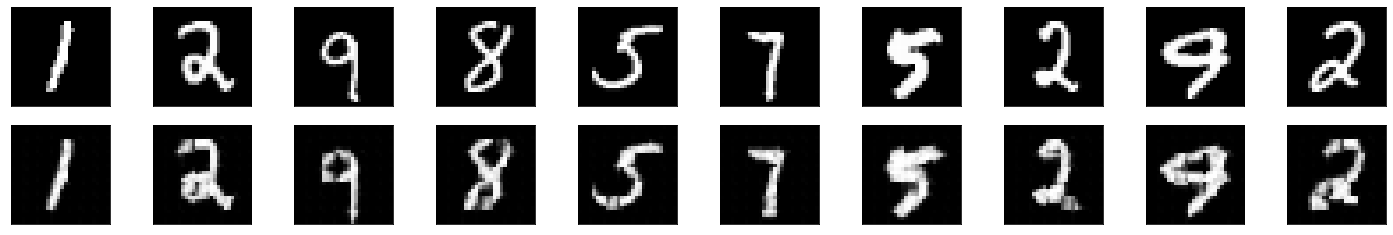

In [18]:
img = x_test[:10]
output = ae.predict(img.reshape(-1,1,28,28))
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

for in_out, row in zip([img, output], axes):
    for i, ax in zip(in_out, row):
        ax.imshow(i.reshape(28,28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

In [ ]:
def noiseImage(image):
    '''
    image: numpy image data
    return noised image numpy data
    '''
    noise = np.random.normal(loc=0.5, scale=0.5, size=image.shape)
    noisedimage = np.clip(image + noise,0.,1.)
    return noisedimage